In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    
    W = (X.T * (wei * X)).I * (X.T * (wei * ymat.T))
    
    return W

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    
    return ypred

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML LAB/10/tips.csv')

colA = np.array(data.total_bill)
colB = np.array(data.tip)

mcolA = np.mat(colA)
mcolB = np.mat(colB)

m = np.shape(mcolA)[1]


one = np.ones((1, m), dtype=int)

X = np.hstack((one.T, mcolA.T))
print(X.shape)

(244, 2)


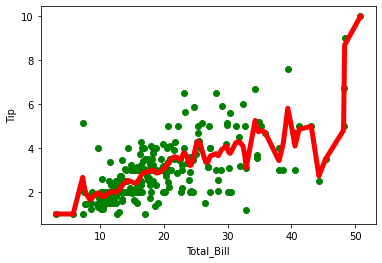

In [5]:
ypred = localWeightRegression(X, mcolB, 0.5)

SortIndex = X[:,1].argsort(0)

xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(colA, colB, color = 'green')
ax.plot(xsort[:,1], ypred[SortIndex], color = 'red', linewidth = 5)

plt.xlabel('Total_Bill')
plt.ylabel('Tip')
plt.show()